In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import os
import librosa
from datetime import datetime

# Data Collecting

In [2]:
def load_dataset(file_path):
    start = datetime.now()
    # # Opens the .tar.gz file specified by 'file_path' 
    with tarfile.open(file_path, "r:gz") as file:
        # Extract the entire contents of the .tar.gz archive to the current directory
        file.extractall()
    print(f"Dataset opened\nrun time: {datetime.now() - start}")    
  
load_dataset("classically_punk_music_genres.tar.gz")

Dataset opened
run time: 0:00:08.780237


In [3]:
def create_dataframe():
    folder = ""
    
    # Lists all subdirectories in 'folder' and assumes them as music genres
    genres = [dr for dr in os.listdir(folder) if os.path.isdir(os.path.join(folder, dr))]
    data = {'file_path': [], 'genre': []}
    for genre in genres:
        genre_path = os.path.join(folder, genre)
        # Traverses each file within the genre's directory
        for file in os.listdir(genre_path):
            # Build relative path for files
            data['file_path'].append(os.path.join('genres', genre, file))
            data['genre'].append(genre)
                       
    df = pd.DataFrame(data)
    return df


df = create_dataframe()
display(df.head())              

,file_path,genre
0,genres/pop/pop.00027.wav,pop
1,genres/pop/pop.00033.wav,pop
2,genres/pop/pop.00032.wav,pop
3,genres/pop/pop.00026.wav,pop
4,genres/pop/pop.00030.wav,pop


In [6]:
def extract_features(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Extract features
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    # Mel Frequency Cepstral Coeﬃcients 
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    # Chroma
    chroma = librosa.feature.chroma_stft(S=np.abs(librosa.stft(y)), sr=sr)
    # Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    # Spectral Bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    # Zero Crossing Rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    # Spectral Contrast
    contrast = librosa.feature.spectral_contrast(S=np.abs(librosa.stft(y)), sr=sr)
    # RMS values
    rms = librosa.feature.rms(y=y)
    # Harmony
    harmony, _ = librosa.effects.hpss(y)
    
    
    # Return the features as a dictionary
    return {
        'tempo': tempo, 
        'length': len(y),
        'mfccs_mean': np.mean(mfccs, axis=1).mean(), 
        'mfccs_var': np.var(mfccs, axis=1).mean(), 
        'chroma_mean': np.mean(chroma, axis=1).mean(), 
        'chroma_var': np.var(chroma, axis=1).mean(), 
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_centroid_var': np.var(spectral_centroid),
        'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
        'spectral_bandwidth_var': np.var(spectral_bandwidth),
        'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
        'zero_crossing_rate_var': np.var(zero_crossing_rate),
        'contrast_mean': np.mean(contrast, axis=1).mean(),
        'rms_mean': np.mean(rms),
        'rms_var': np.var(rms),
        'harmony_mean': np.mean(harmony),
        'harmony_var': np.var(harmony)
        
    }
    
df['features'] = df['file_path'].apply(extract_features)
features_df = pd.json_normalize(df['features'])
# Concatenamos con tu DataFrame original para tener un DataFrame expandido
df_expanded = pd.concat([df.drop(columns=['features']), features_df], axis=1)
display(df_expanded)   


,file_path,genre,tempo,length,mfccs_mean,mfccs_var,chroma_mean,chroma_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,zero_crossing_rate_mean,zero_crossing_rate_var,contrast_mean,rms_mean,rms_var,harmony_mean,harmony_var
0,genres/pop/pop.00027.wav,pop,83.354335,661504,4.628819,529.806030,0.607422,0.050053,2682.284141,8.052991e+05,2923.967729,190731.575470,0.101867,0.002827,17.911909,0.157902,0.002739,-5.627722e-07,0.012226
1,genres/pop/pop.00033.wav,pop,99.384014,661504,1.537203,888.666382,0.645374,0.045345,2835.119375,4.375327e+05,2731.752387,163886.609471,0.137010,0.002432,16.841431,0.139896,0.002499,-1.384246e-04,0.010611
2,genres/pop/pop.00032.wav,pop,95.703125,661504,-0.713037,716.076843,0.635885,0.047988,4225.461049,1.637053e+06,3404.380733,105212.009597,0.228641,0.018661,17.239673,0.097861,0.002146,-1.121036e-05,0.003833
3,genres/pop/pop.00026.wav,pop,75.999540,661504,3.290227,535.403870,0.522997,0.054160,2525.591959,1.009068e+06,2848.409561,276177.417023,0.103494,0.003888,19.143264,0.195626,0.007856,8.091549e-06,0.022925
4,genres/pop/pop.00030.wav,pop,95.703125,661504,3.742433,394.803833,0.602999,0.042804,3070.672741,6.090035e+05,2975.765677,125019.755279,0.148679,0.004606,17.165469,0.203093,0.006338,-1.197016e-05,0.022783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,genres/jazz/jazz.00018.wav,jazz,103.359375,661794,-3.987757,96.011360,0.561503,0.048799,1993.412987,6.470874e+04,2127.193077,36027.159837,0.087708,0.000671,22.081008,0.052224,0.000315,2.466209e-05,0.002038
996,genres/jazz/jazz.00032.wav,jazz,129.199219,661794,-12.457352,404.311371,0.471819,0.090399,1522.089431,3.270912e+05,1909.705794,184821.284365,0.061381,0.001162,20.722193,0.040506,0.000569,-2.013597e-06,0.001303
997,genres/jazz/jazz.00026.wav,jazz,151.999081,661794,-19.679976,571.451599,0.302988,0.086035,1367.435200,4.223592e+05,1638.954923,235847.231326,0.058610,0.002948,25.332236,0.031939,0.000315,-6.990927e-06,0.001303
998,genres/jazz/jazz.00027.wav,jazz,143.554688,661794,-6.673337,233.777084,0.542953,0.062992,1769.428268,1.062317e+05,2113.360398,75922.395297,0.062681,0.000675,21.398052,0.040594,0.000251,-9.407906e-07,0.001319


In [8]:
def load_csv():
    df = pd.read_csv('dataset_music.csv')
    return df

df = load_csv()


# Data Exploration


In [9]:
def print_summarize_dataset(df):
    print("Data Types:")
    print(df.dtypes)
    print()
    print("Statistical summary:")
    display(df.describe())
    
print_summarize_dataset(df)

Data Types:
file_path                   object
genre                       object
tempo                      float64
length                       int64
mfccs_mean                 float64
mfccs_var                  float64
chroma_mean                float64
chroma_var                 float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
contrast_mean              float64
rms_mean                   float64
rms_var                    float64
harmony_mean               float64
harmony_var                float64
dtype: object

Statistical summary:


,tempo,length,mfccs_mean,mfccs_var,chroma_mean,chroma_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,zero_crossing_rate_mean,zero_crossing_rate_var,contrast_mean,rms_mean,rms_var,harmony_mean,harmony_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.335389,662030.846000,-0.362997,463.931454,0.588874,0.046469,2201.887215,4.695929e+05,2242.631019,137032.021278,0.103612,0.002986,20.513956,0.130858,0.003051,-0.000366,0.012542
std,28.104602,1784.073992,7.585504,268.680074,0.101034,0.012827,715.916104,4.007595e+05,526.270208,96377.086340,0.041821,0.003024,2.180875,0.065646,0.003633,0.001684,0.011655
min,58.726918,660000.000000,-30.154660,57.926872,0.265474,0.011179,570.349904,7.996725e+03,900.409298,11146.734295,0.021697,0.000044,13.493065,0.005270,0.000004,-0.026058,0.000049
25%,99.384014,661504.000000,-3.970375,270.350638,0.524346,0.038266,1627.911508,1.845128e+05,1907.200106,67316.891464,0.070244,0.001079,18.781341,0.086612,0.000941,-0.000104,0.004383
50%,117.453835,661794.000000,1.247414,406.602490,0.608570,0.046268,2209.334372,3.384935e+05,2221.373053,111952.903948,0.099503,0.002022,20.585064,0.122382,0.001823,-0.000003,0.008770
75%,135.999178,661794.000000,4.948617,600.049125,0.658844,0.054929,2691.335269,6.121681e+05,2578.534635,182412.345173,0.131944,0.003628,21.955466,0.175591,0.003583,0.000001,0.016948
max,234.907670,675808.000000,13.433870,2393.321300,0.833525,0.090399,4435.732059,3.033959e+06,3509.656095,694624.872941,0.274631,0.028718,27.926871,0.397734,0.027704,0.015051,0.085633


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   file_path                1000 non-null   object 
 1   genre                    1000 non-null   object 
 2   tempo                    1000 non-null   float64
 3   length                   1000 non-null   int64  
 4   mfccs_mean               1000 non-null   float64
 5   mfccs_var                1000 non-null   float64
 6   chroma_mean              1000 non-null   float64
 7   chroma_var               1000 non-null   float64
 8   spectral_centroid_mean   1000 non-null   float64
 9   spectral_centroid_var    1000 non-null   float64
 10  spectral_bandwidth_mean  1000 non-null   float64
 11  spectral_bandwidth_var   1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  contrast_mean            

In [11]:
songs_by_genre = df['genre'].value_counts()
print(songs_by_genre)

genre
pop          100
metal        100
disco        100
blues        100
reggae       100
classical    100
rock         100
hiphop       100
country      100
jazz         100
Name: count, dtype: int64


# Data Visualization

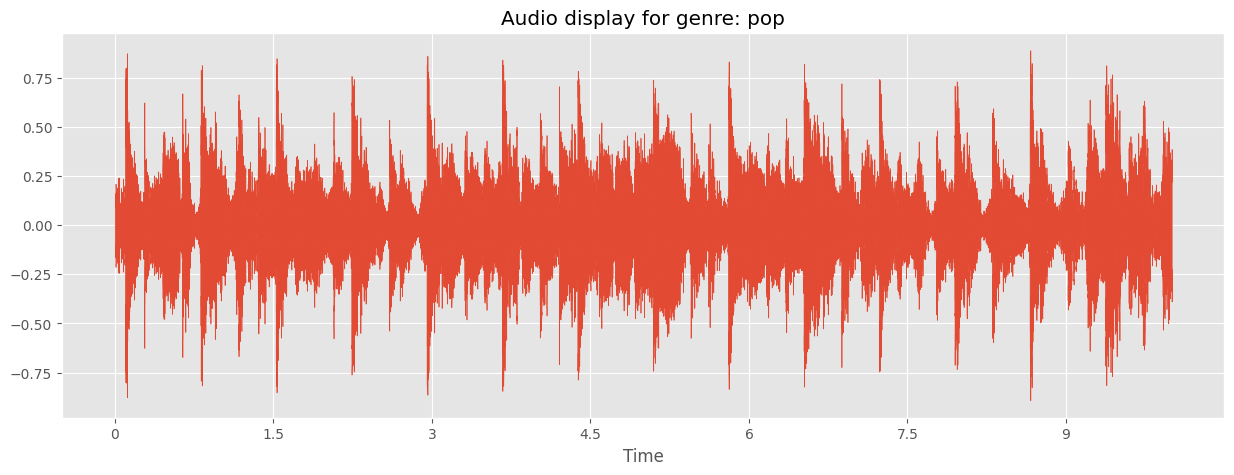

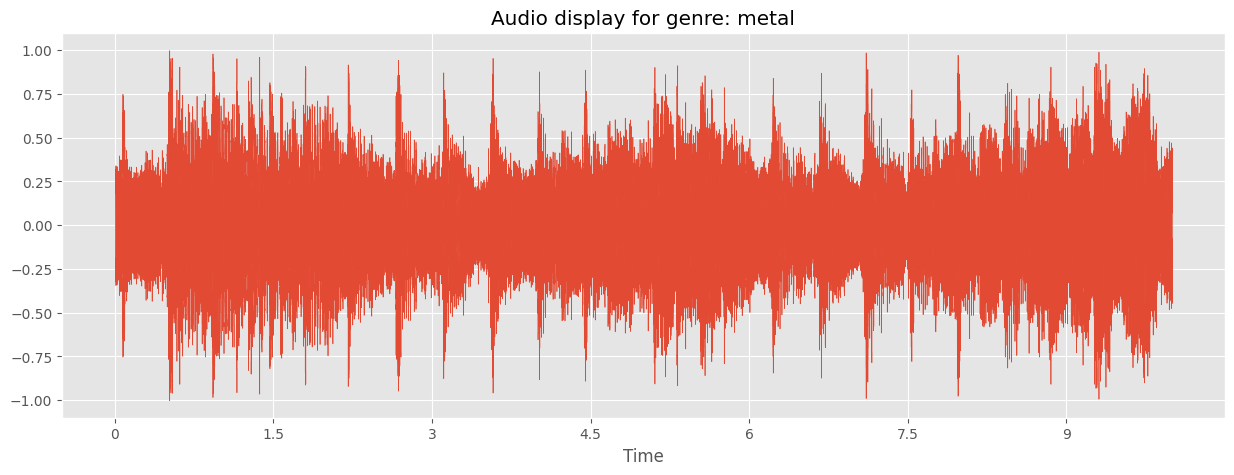

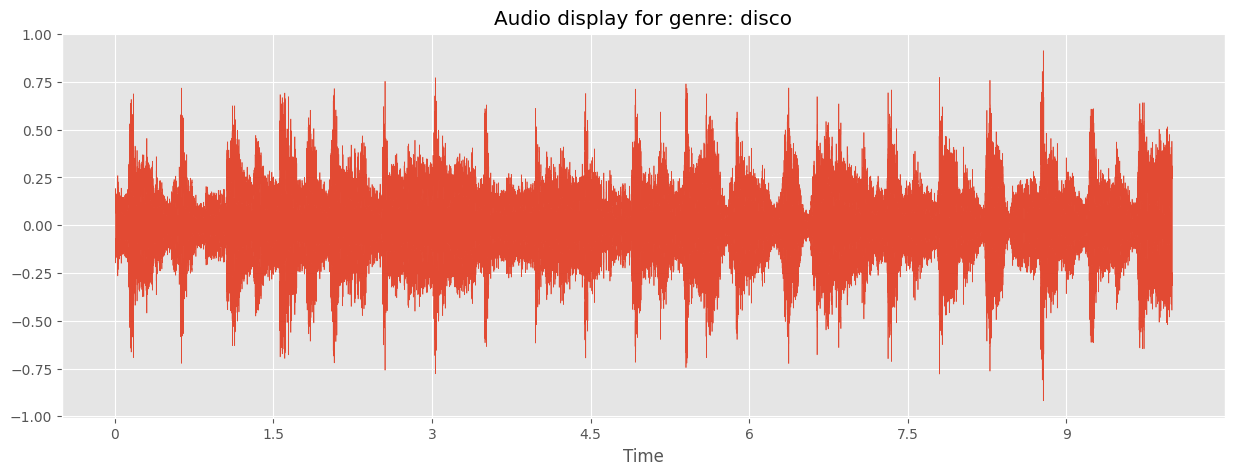

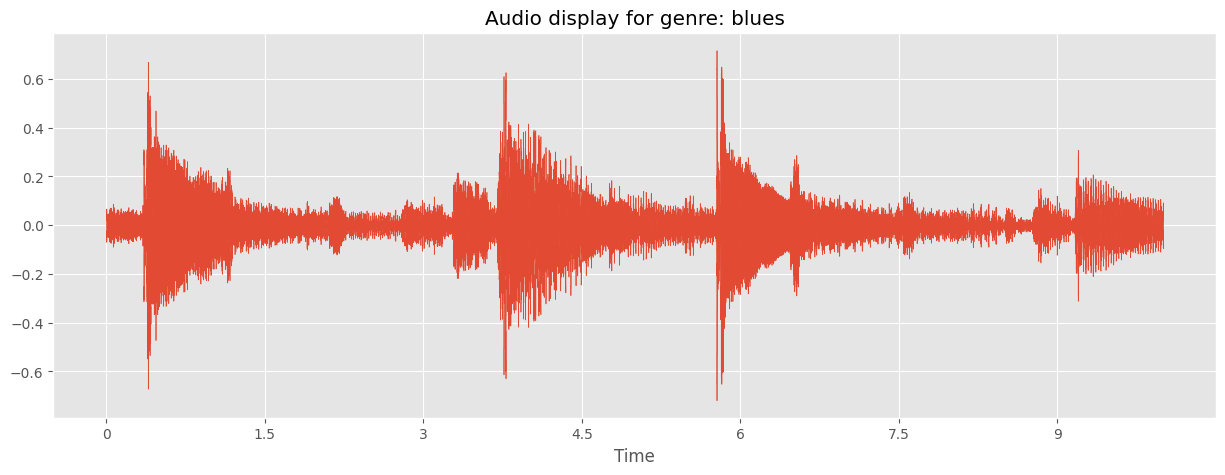

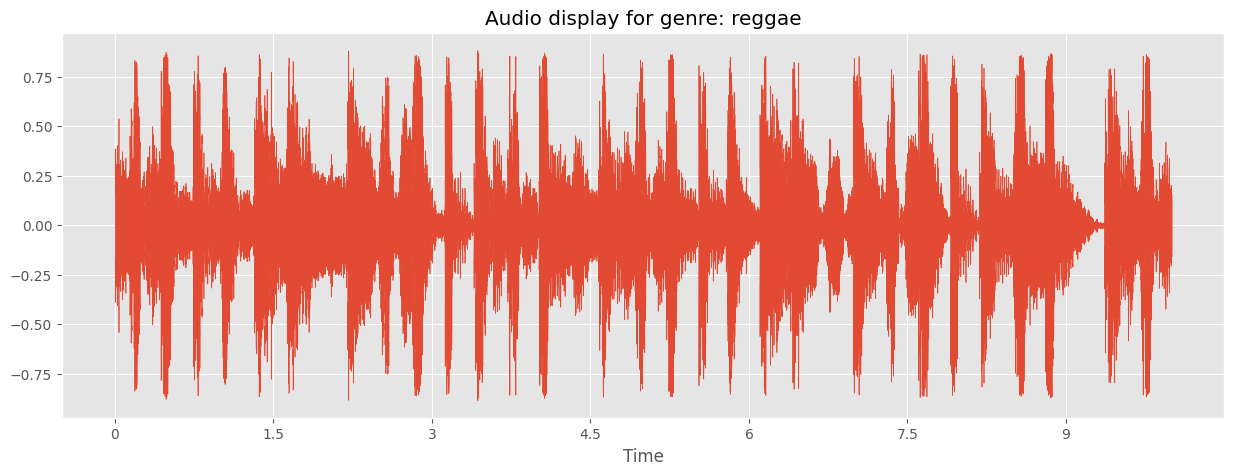

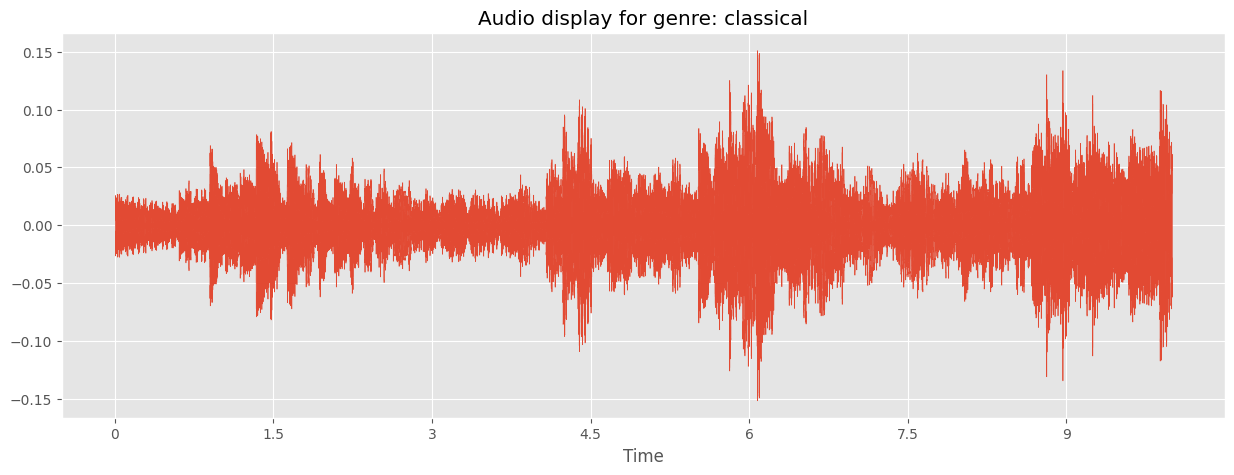

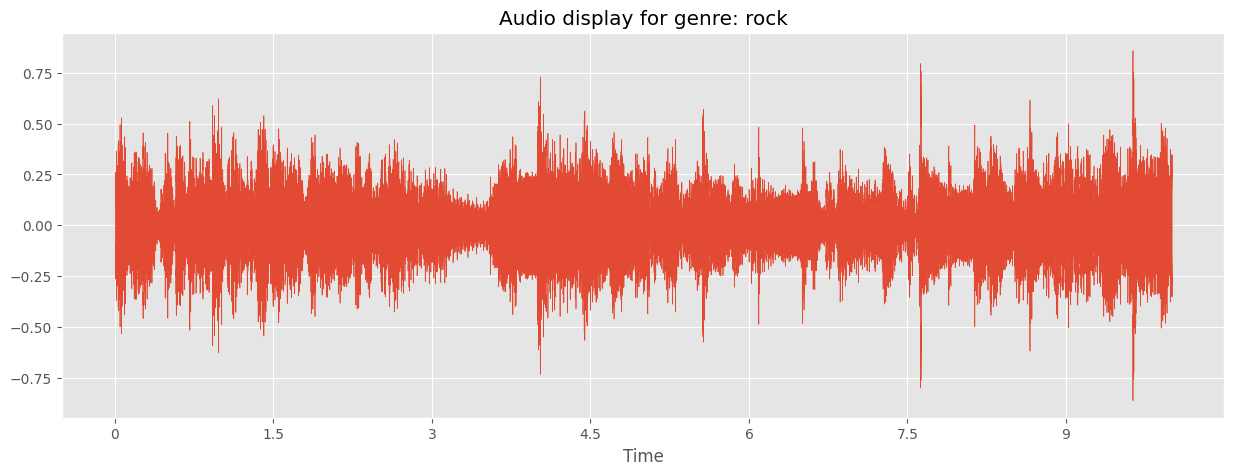

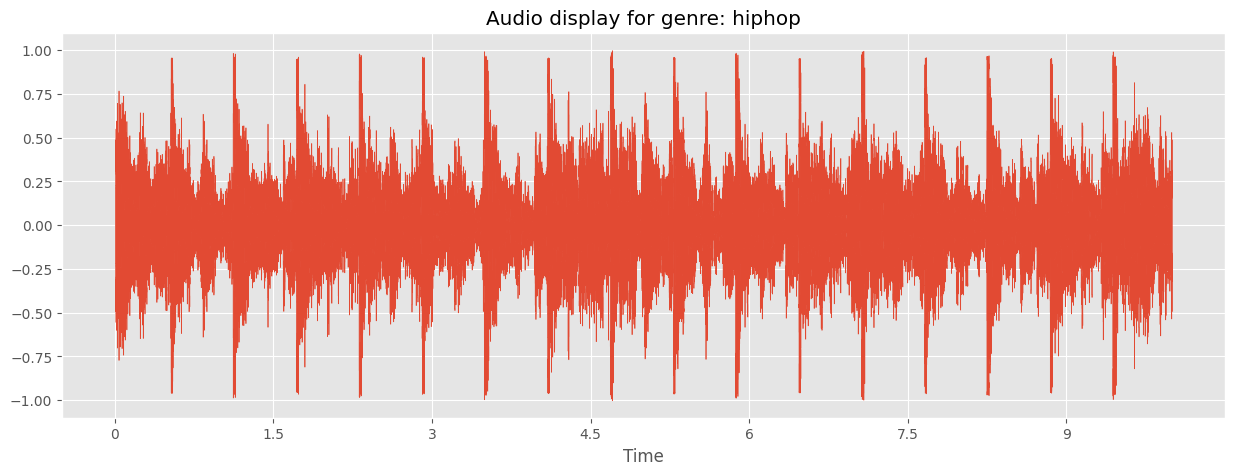

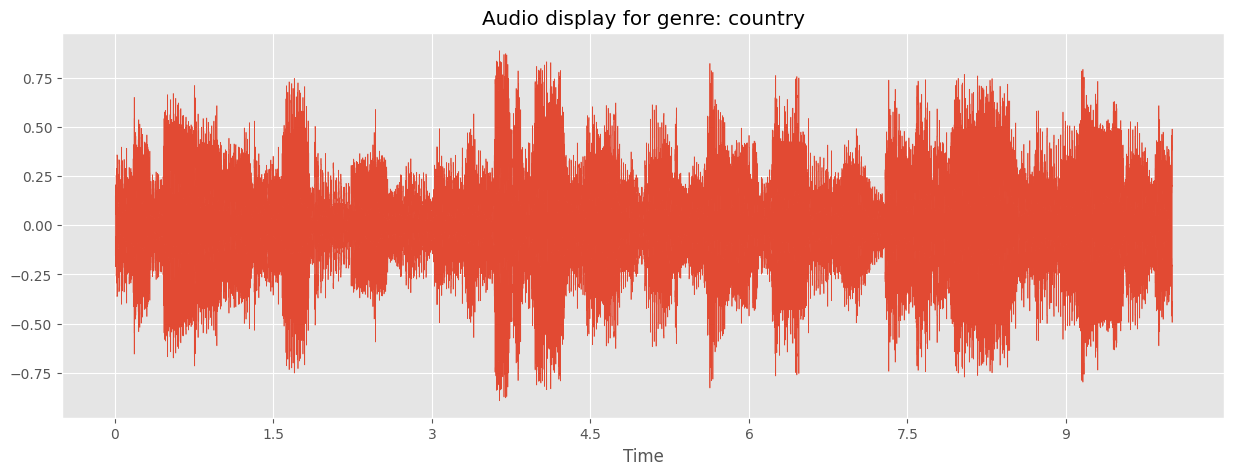

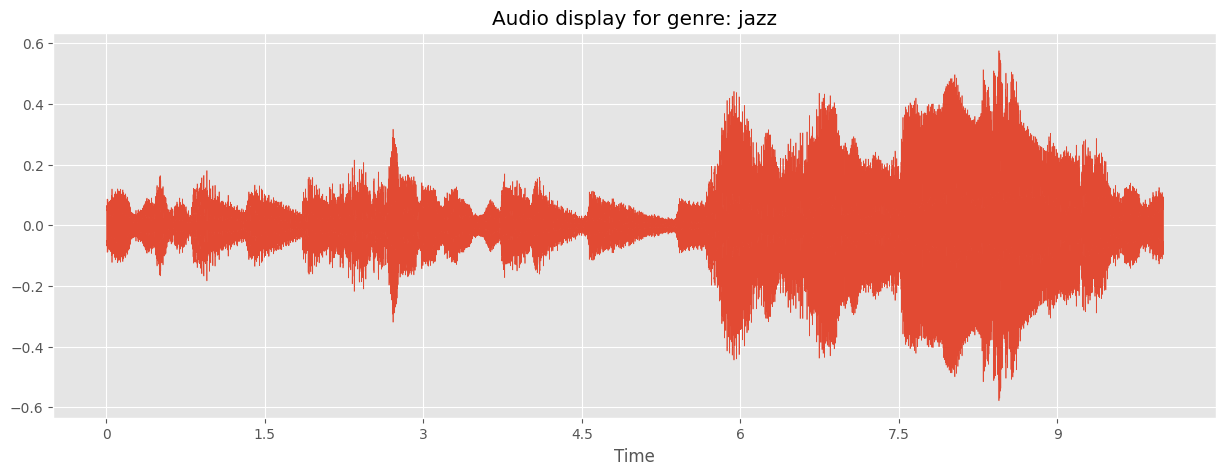

In [12]:
def plot_audios(df):
    plt.style.use('ggplot')
    
    # Identify all unique genres in the DataFrame
    unique_genres = df['genre'].unique()
    
    # Iterate through unique genres
    for genre in unique_genres:
        # Filter the DataFrame by the current genre
        genre_df = df[df['genre'] == genre]
        
        if not genre_df.empty:
            # Select the first audio file of the current genre.
            file_path = genre_df.iloc[0]['file_path']
            
            # Load the audio file
            y, sr = librosa.load(file_path, duration=10)
            
            plt.figure(figsize=(15, 5))
            plt.title(f'Audio display for genre: {genre}')
            # Display the waveform
            librosa.display.waveshow(y, sr=sr)
            
            plt.xlabel('Time')
            plt.show()
            
plot_audios(df)

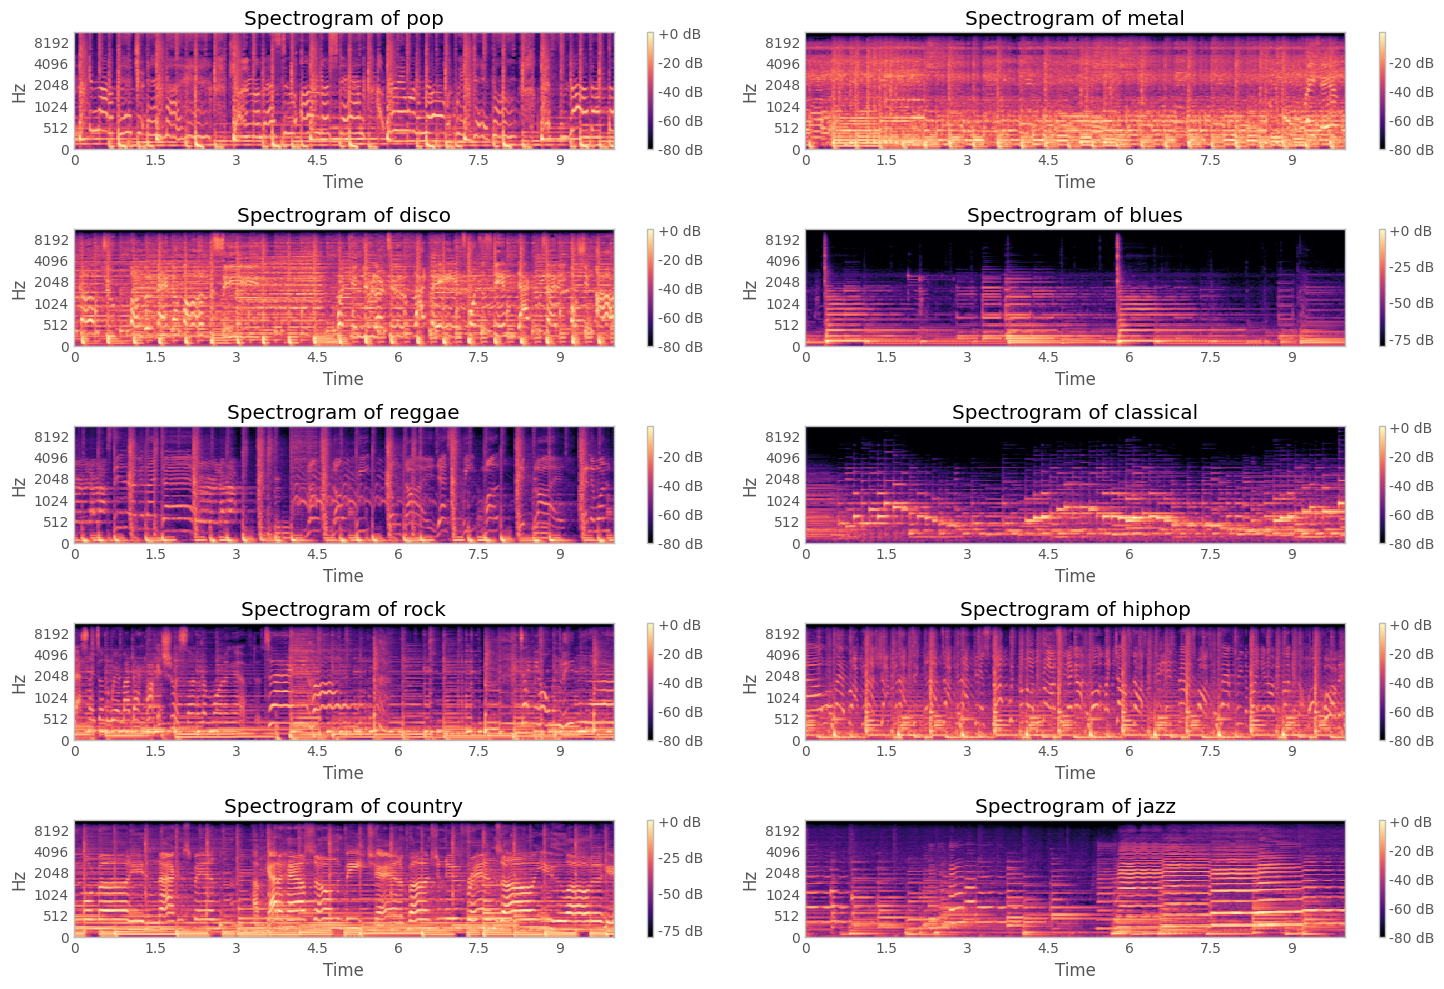

In [43]:
def plot_spectrograms(df):
    plt.style.use('bmh')
    
    unique_genres = df['genre'].unique()
    fig, ax = plt.subplots(5, 2, figsize=(15, 10))
    # Ensure that axs is a 2D array
    ax = ax.flatten()
    
    # Iterating through unique genres
    for i, genre in enumerate(unique_genres):
        genre_df = df[df['genre'] == genre]
        
        if not genre_df.empty:
            file_path = genre_df.iloc[0]['file_path']
            y, sr = librosa.load(file_path, duration=10)
            # Obtain the spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr)
            S_dB = librosa.power_to_db(S, ref=np.max)
            
            # Display the specshow
            img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, ax=ax[i])
            ax[i].set_title(f"Spectrogram of {genre}")
            fig.colorbar(img, ax=ax[i], format='%+2.0f dB')
            
    plt.tight_layout()
    plt.show()
    
plot_spectrograms(df)

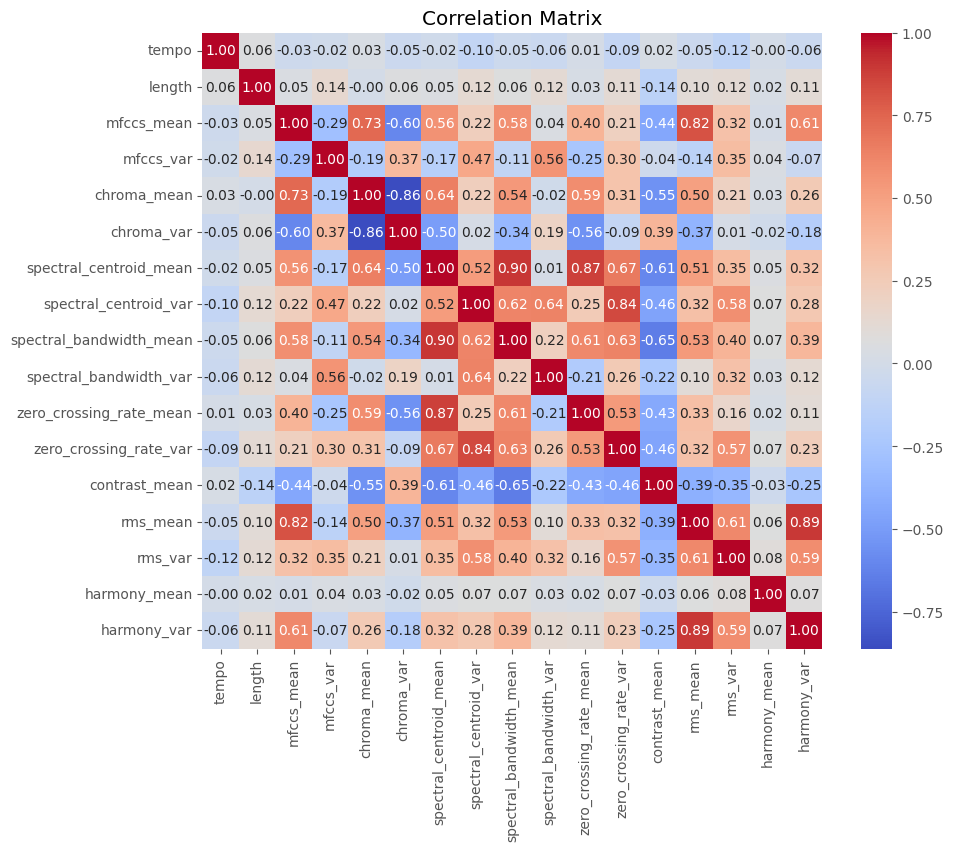

In [13]:
def plot_heatmap(df):
    # Filter the DataFrame to include only numerical columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    corr = df_numeric.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
    
plot_heatmap(df)

# Machine Learning

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import joblib

In [39]:
class MusicGenreClassifier:
    def __init__(self, df_expanded):
        #  Initialize the classifier, set up data, label encoder, and models for training
        self.df_expanded = df_expanded
        self.encoder = LabelEncoder()
        self.scaler = StandardScaler()
        self.models = {
            'RandomForestClassifier': RandomForestClassifier(),
            'DecisionTree': DecisionTreeClassifier(),
            'GradienBoosting': GradientBoostingClassifier(),
            'GaussianNB': GaussianNB(),
            'SVC': SVC(probability=True),
            'XGBClassifier': XGBClassifier()
        }
        self.X_train, self.X_test, self.y_train, self.y_test = self.prepare_data()
        self.results = {}
        
        
    def prepare_data(self):
        # Divide the data into training and test sets
        X = self.df_expanded.drop(['file_path', 'genre'], axis = 1)
        y = self.encoder.fit_transform(self.df_expanded['genre'])
        joblib.dump(self.encoder, 'label_encoder.joblib') # Save the label encoder for later use
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_scaled = self.scaler.fit_transform(X_train) # Scale training data
        X_test_scaled = self.scaler.transform(X_test)  # Scale test data using the same scaler
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    def optimize_hyperparameters_for_rf(self):
        # Optimize hyperparameters for RandomForestClassifier using GridSearchCV
        param_grid = {
            'n_estimators': [100, 150, 200],
            'max_depth': [10, 20, 30],
            'random_state': [42]
        }
        grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
        grid_search.fit(self.X_train, self.y_train)
        best_model = grid_search.best_estimator_ # Get the best model found
        print(f"Better hyperparameters: {grid_search.best_params_}")
        self.models['RandomForestClassifier'] = best_model
    
    def train_and_evaluate(self):
        #  Train each model and evaluate its performance
        for name, model in self.models.items():
            pipeline = Pipeline([('scaler', self.scaler), ('model', model)])
            joblib.dump(self.scaler, 'scaler.joblib')
            # Train the pipeline with the training data
            pipeline.fit(self.X_train, self.y_train) 
            y_pred = pipeline.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, y_pred)
            conf_matrix = confusion_matrix(self.y_test, y_pred)
            cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=5)
            self.results[name] = {
                'Accuracy': accuracy,
                'Confusion Matrix': conf_matrix,
                'Cross-Validation Score': cv_scores.mean(),
            }
            
    def get_results(self):
        return self.results
    

In [40]:
genre_classifier = MusicGenreClassifier(df_expanded)
genre_classifier.train_and_evaluate()
results = genre_classifier.get_results()
for model, metrics in results.items():
    print(f'Model: {model}')
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print(f"Cross-Validation Score: {metrics['Cross-Validation Score']:.2f}")
    print()

Model: RandomForestClassifier
Accuracy: 0.75
Confusion Matrix:
[[14  0  3  0  0  0  0  0  3  1]
 [ 0 19  0  0  0  3  0  0  0  0]
 [ 3  0 16  0  0  3  0  0  0  1]
 [ 0  0  1 22  0  0  2  0  0  2]
 [ 0  0  0  0 12  0  0  0  1  0]
 [ 1  1  2  1  0 15  0  0  0  1]
 [ 0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0  1  1  0  0 17  1  0]
 [ 1  1  0  2  0  0  0  0 11  0]
 [ 5  0  4  2  2  1  0  0  0 11]]
Cross-Validation Score: 0.71

Model: DecisionTree
Accuracy: 0.57
Confusion Matrix:
[[11  0  2  0  0  3  0  0  2  3]
 [ 0 19  1  0  0  1  0  0  0  1]
 [ 5  0  8  0  0  6  0  0  0  4]
 [ 0  0  2 18  1  0  3  0  0  3]
 [ 0  0  0  1  8  1  0  0  2  1]
 [ 1  2  3  0  0 11  1  0  0  3]
 [ 0  0  0  0  1  0 12  0  0  0]
 [ 0  0  0  1  0  0  1 13  5  0]
 [ 1  1  0  0  1  0  2  3  6  1]
 [ 5  0  3  0  3  3  1  0  1  9]]
Cross-Validation Score: 0.58

Model: GradienBoosting
Accuracy: 0.73
Confusion Matrix:
[[13  0  5  0  0  0  0  0  2  1]
 [ 0 19  0  0  0  3  0  0  0  0]
 [ 1  0 19  0  0  2  0  0  1  0]
 [ 0  0

In [30]:
# Save models
joblib.dump(genre_classifier.models['RandomForestClassifier'], 'random_forest_classifier.joblib')
joblib.dump(genre_classifier.models['GradienBoosting'], 'gradient_boosting_classifier.joblib')
joblib.dump(genre_classifier.models['XGBClassifier'], 'xgb_classifier.joblib')

['xgb_classifier.joblib']

In [31]:
class MusicGenrePredictor:
    # Load pre-trained models, the scaler, and the label encoder
    def __init__(self):
        self.models = {
            'RandomForestClassifier': joblib.load('random_forest_classifier.joblib'),
            'GradientBoosting': joblib.load('gradient_boosting_classifier.joblib'),
            'XGBClassifier': joblib.load('xgb_classifier.joblib')
        }
        self.scaler = joblib.load('scaler.joblib') # Used for scaling feature values
        self.encoder = joblib.load('label_encoder.joblib') # Used for decoding genre labels
        
    def extract_features(self, file_path):
        # Extracts audio features from a file path to an audio file
        y, sr = librosa.load(file_path, mono=True, duration=30)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        contrast = librosa.feature.spectral_contrast(S=np.abs(librosa.stft(y)), sr=sr)
        rms = librosa.feature.rms(y=y)
        harmony, _ = librosa.effects.hpss(y)
        
        return {
            'tempo': tempo,
            'length': len(y), 
            'mfccs_mean': np.mean(mfccs),
            'mfccs_var': np.var(mfccs),
            'chroma_mean': np.mean(chroma),
            'chroma_var': np.var(chroma),
            'spectral_centroid_mean': np.mean(spectral_centroid),
            'spectral_centroid_var': np.var(spectral_centroid),
            'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
            'spectral_bandwidth_var': np.var(spectral_bandwidth),
            'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
            'zero_crossing_rate_var': np.var(zero_crossing_rate),
            'contrast_mean': np.mean(contrast),
            'rms_mean': np.mean(rms),
            'rms_var': np.var(rms),
            'harmony_mean': np.mean(harmony),
            'harmony_var': np.var(harmony)
        }
    
        pass
    
    def predict_genre(self, file_path):
        # Predicts the genre of a music track given its file path
        features_dict = self.extract_features(file_path)
        # Make sure the features are in the same order as during training
        features_ordered = [features_dict[feature] for feature in sorted(features_dict)]
        features_array = np.array([features_ordered]) # Convert to 2D array
        features_scaled = self.scaler.transform(features_array)
    
        predictions = {}
        for name, model in self.models.items():
            prediction = model.predict(features_scaled) # Predict with each model
            genre = self.encoder.inverse_transform(prediction)[0]
            predictions[name] = genre
    
        return predictions

In [34]:
predictor = MusicGenrePredictor()
file_path = 'musica-DJ-Jimmy-Singh-We-be-Clubbin.mp3' 
predictions = predictor.predict_genre(file_path)
print(predictions)

{'RandomForestClassifier': 'hiphop', 'GradientBoosting': 'hiphop', 'XGBClassifier': 'blues'}
